<a href="https://colab.research.google.com/github/Mohammed0Arfath/Qiskit_QFT/blob/main/Qiskit_QFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [4]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [5]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [6]:
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      



=== TASK 1: Vary the Number of Qubits ===

🧮 QFT on 2 qubits


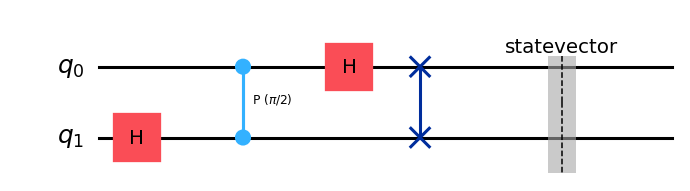

                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      

🧮 QFT on 3 qubits


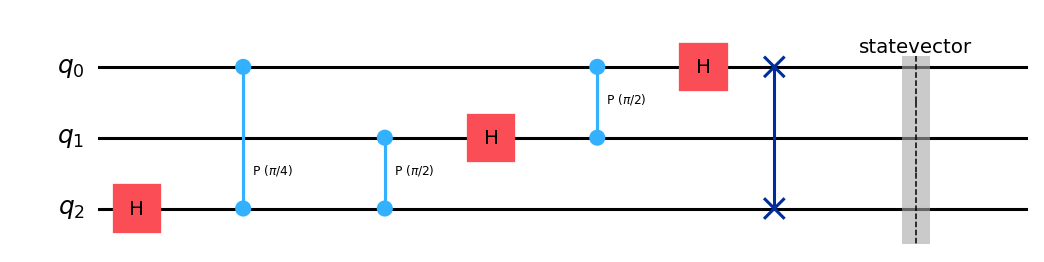

                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      

🧮 QFT on 4 qubits


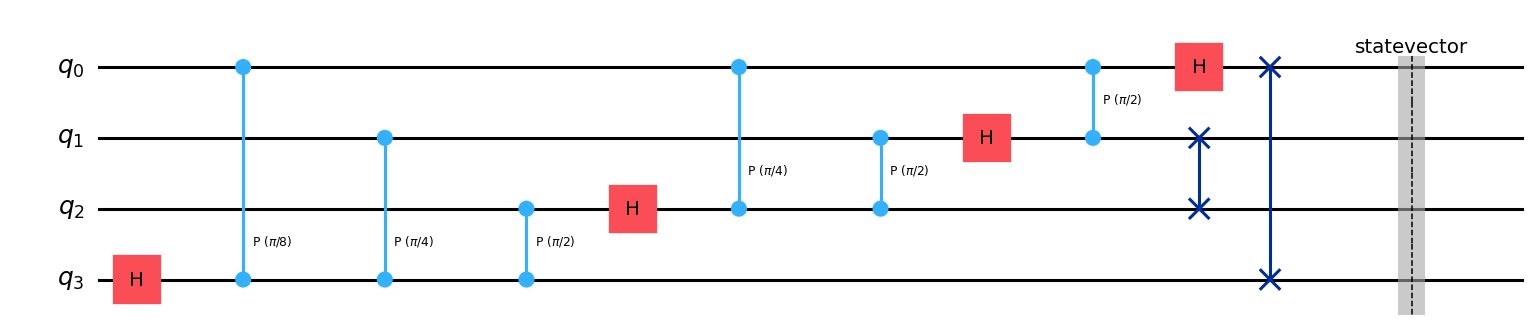

                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«         statevector 
«q_0: ─X───────░──────
«      │       ░      
«q_1: ─┼───────░──────
«      │       ░      
«q_2: ─┼───────░──────
«      │       ░      
«q_3: ─X───────░──────
«              ░      

=== TASK 2: Implement Inverse QFT (IQFT) ===


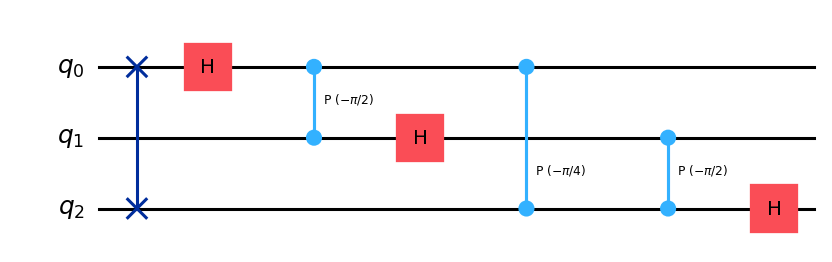

        ┌───┐                                        
q_0: ─X─┤ H ├─■──────────────■───────────────────────
      │ └───┘ │P(-π/2) ┌───┐ │                       
q_1: ─┼───────■────────┤ H ├─┼─────────■─────────────
      │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐
q_2: ─X──────────────────────■─────────■────────┤ H ├
                                                └───┘


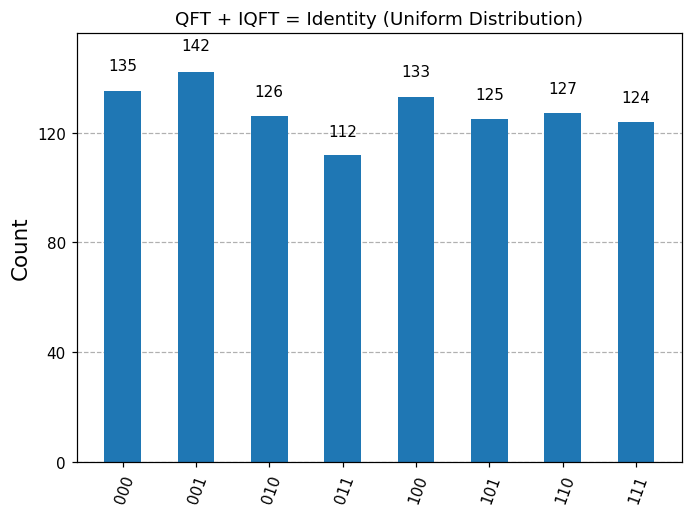


=== TASK 3: Integration with Phase Estimation ===


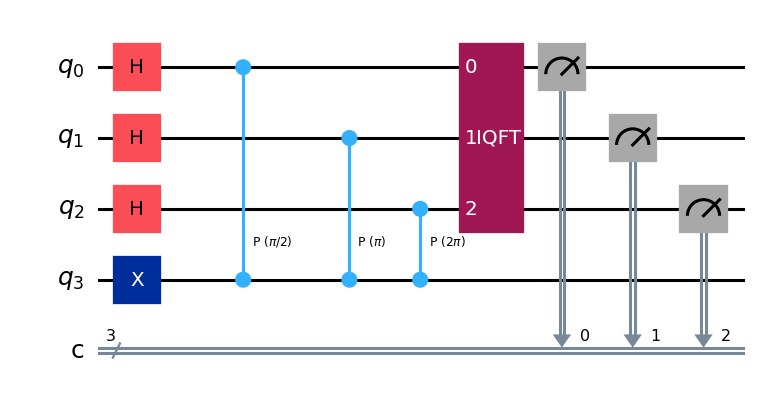

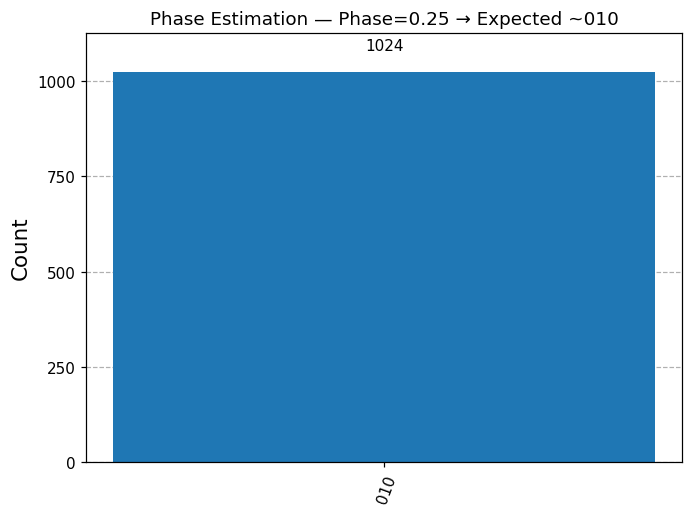


=== TASK 4: Measure Output States (QFT + Measurement) ===


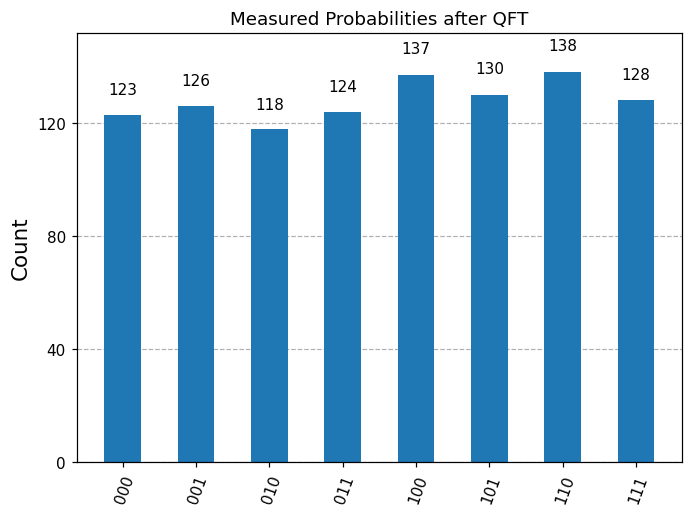


=== TASK 5: Circuit Visualization (mpl Style) ===


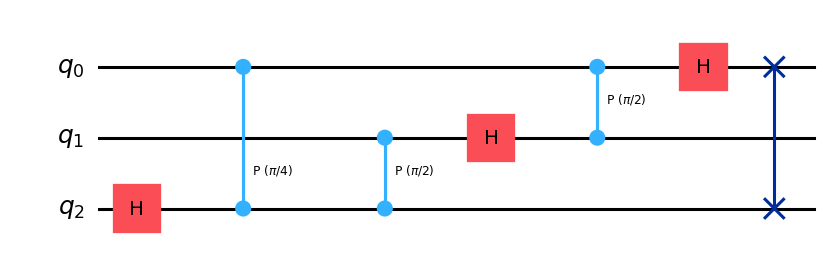

In [8]:
# ============================================================
# INSTALL DEPENDENCIES
# ============================================================
!pip install -q qiskit qiskit-aer matplotlib pylatexenc

# ============================================================
# IMPORTS + DISPLAY FIX
# ============================================================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import (
    plot_bloch_multivector, plot_histogram
)
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# --- Force stable inline backend for Colab ---
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")
plt.rcParams["figure.dpi"] = 110

# ============================================================
# QFT + IQFT BUILDING BLOCKS
# ============================================================
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def qft_circuit(n):
    """Full Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc


def inverse_qft_circuit(n):
    """Inverse QFT (IQFT) — inverse rotations and swaps."""
    qc = QuantumCircuit(n)
    swap_registers(qc, n)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2**(j - k), k, j)
        qc.h(j)
    qc.name = "IQFT"
    return qc


# ============================================================
# QFT SIMULATION
# ============================================================
def run_qft(n, show_bloch=True):
    """Run QFT circuit and display Bloch / circuit diagram."""
    qc = qft_circuit(n)
    simulator = AerSimulator(method="statevector")
    qc.save_statevector()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    statevector = result.data(0)["statevector"]

    print(f"\n🧮 QFT on {n} qubits")
    fig_circ = qc.draw("mpl")
    display(fig_circ)

    if show_bloch:
        fig_bloch = plot_bloch_multivector(statevector)
        display(fig_bloch)
        plt.close(fig_bloch)
    else:
        plt.close("all")

    print(qc.draw(output="text"))
    return statevector


# ============================================================
# TASK 1 — Vary Number of Qubits
# ============================================================
print("\n=== TASK 1: Vary the Number of Qubits ===")
for n in [2, 3, 4]:
    run_qft(n, show_bloch=False)

# ============================================================
# TASK 2 — INVERSE QFT
# ============================================================
print("\n=== TASK 2: Implement Inverse QFT (IQFT) ===")
n = 3
iqft = inverse_qft_circuit(n)
fig_iqft = iqft.draw("mpl")
display(fig_iqft)
print(iqft.draw(output="text"))

# Verify IQFT cancels QFT
qc_test = QuantumCircuit(n)
qc_test.h(range(n))          # create superposition
qc_test.compose(qft_circuit(n), inplace=True)
qc_test.compose(iqft, inplace=True)
qc_test.measure_all()

sim = AerSimulator()
compiled = transpile(qc_test, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
fig_hist = plot_histogram(counts, title="QFT + IQFT = Identity (Uniform Distribution)")
display(fig_hist)
plt.close(fig_hist)

# ============================================================
# TASK 3 — PHASE ESTIMATION EXAMPLE
# ============================================================
print("\n=== TASK 3: Integration with Phase Estimation ===")

def phase_estimation_example():
    """Simple phase estimation using QFT."""
    n_count = 3   # counting qubits
    qc = QuantumCircuit(n_count + 1, n_count)

    # Prepare eigenstate |1⟩ of U
    qc.x(n_count)

    # Apply Hadamards to counting qubits
    qc.h(range(n_count))

    # Controlled-U operations (phase rotation)
    for qubit in range(n_count):
        qc.cp(2 * np.pi * 0.25 * 2**qubit, qubit, n_count)

    # Apply inverse QFT
    qc.append(inverse_qft_circuit(n_count), range(n_count))

    qc.measure(range(n_count), range(n_count))
    return qc

qc_pe = phase_estimation_example()
fig_pe = qc_pe.draw("mpl")
display(fig_pe)

sim = AerSimulator()
compiled = transpile(qc_pe, sim)
res = sim.run(compiled, shots=1024).result()
counts_pe = res.get_counts()
fig_pe_hist = plot_histogram(counts_pe, title="Phase Estimation — Phase=0.25 → Expected ~010")
display(fig_pe_hist)
plt.close(fig_pe_hist)

# ============================================================
# TASK 4 — MEASURE OUTPUT STATES (PROBABILITY DISTRIBUTION)
# ============================================================
print("\n=== TASK 4: Measure Output States (QFT + Measurement) ===")

n = 3
qc_meas = qft_circuit(n)
qc_meas.measure_all()

sim = AerSimulator()
res = sim.run(transpile(qc_meas, sim), shots=1024).result()
counts_meas = res.get_counts()
fig_meas = plot_histogram(counts_meas, title="Measured Probabilities after QFT")
display(fig_meas)
plt.close(fig_meas)

# ============================================================
# TASK 5 — CIRCUIT VISUALIZATION
# ============================================================
print("\n=== TASK 5: Circuit Visualization (mpl Style) ===")
qc_viz = qft_circuit(3)
fig_viz = qc_viz.draw("mpl")
display(fig_viz)
plt.close(fig_viz)
